# Semantic Graph Visualizer

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from src.graph_processor import MapProcessor
map_idxs = [False, False, True, True, False, False, True, True, True, False]

# Step by step Simplification Pipeline

In [2]:
# 2
base_dir = 'datasets/amelia'
airport  = 'kbos'
out_dir = f"out"
processor = MapProcessor(base_dir, out_dir, airport, save=False, show=True)

In [3]:
raw_stats = processor.get_aiport_stats()

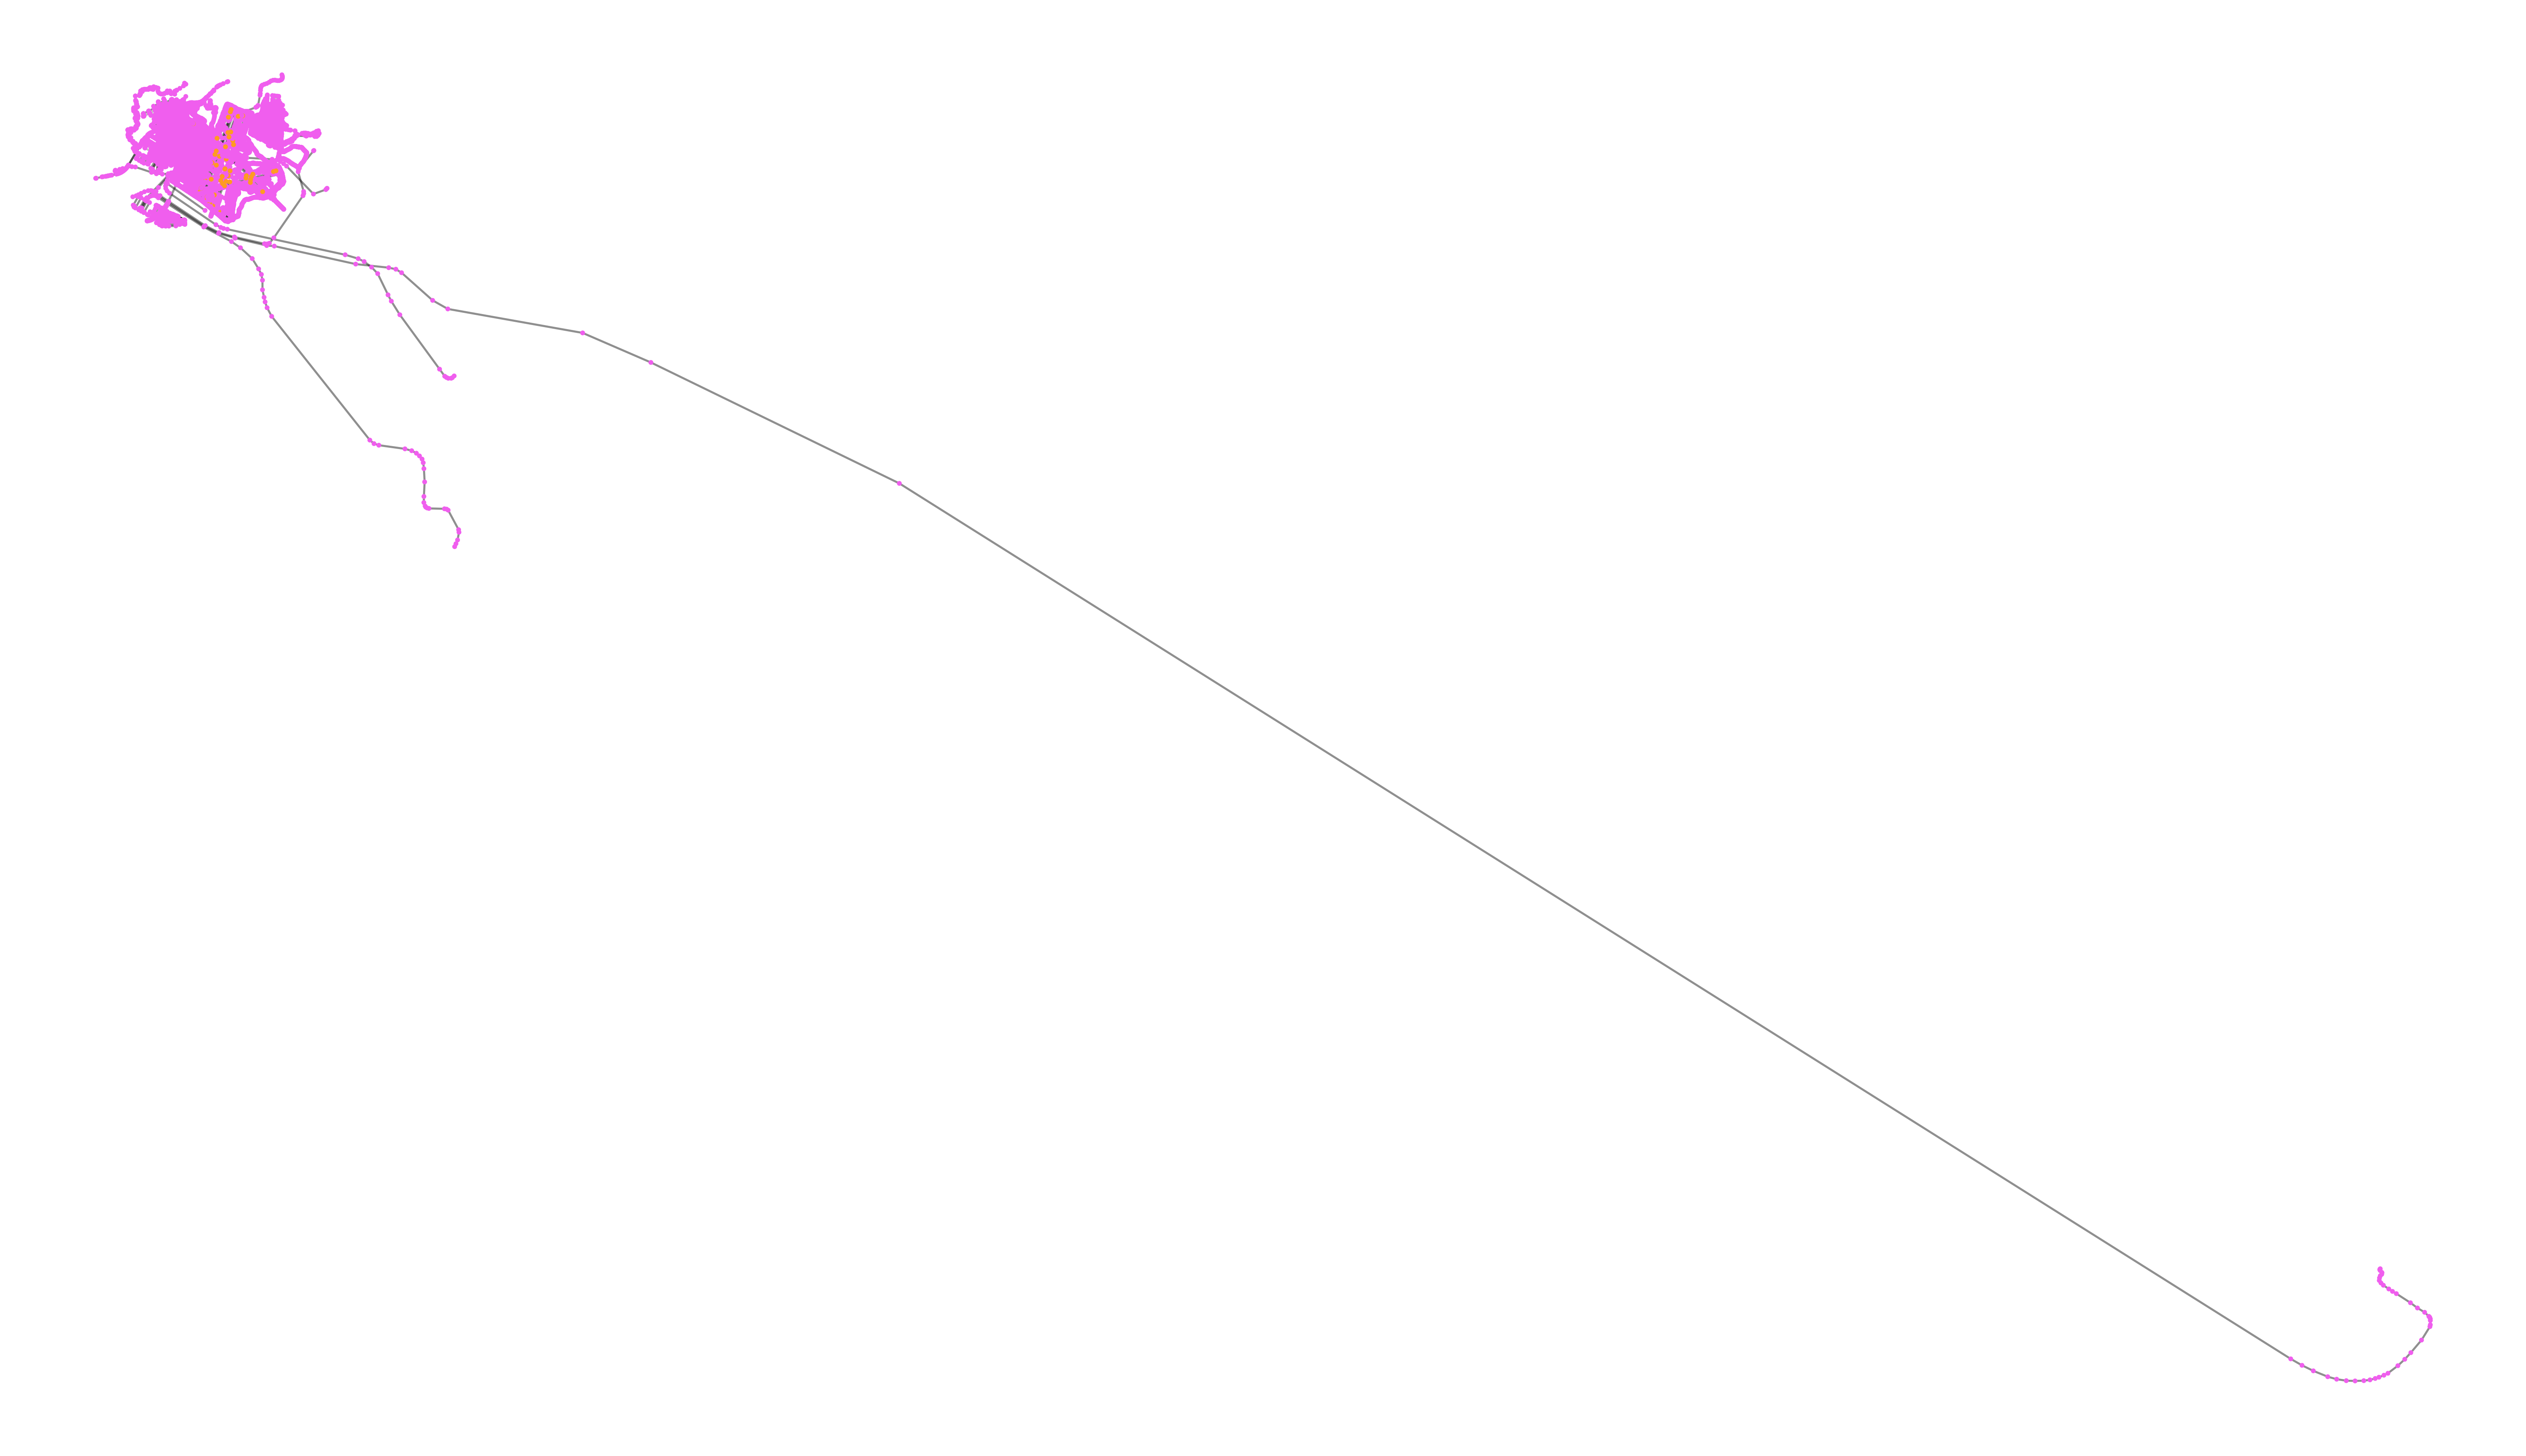

In [4]:
processor.semantify_nodes()
processor.display_and_save(save=False, show=True)

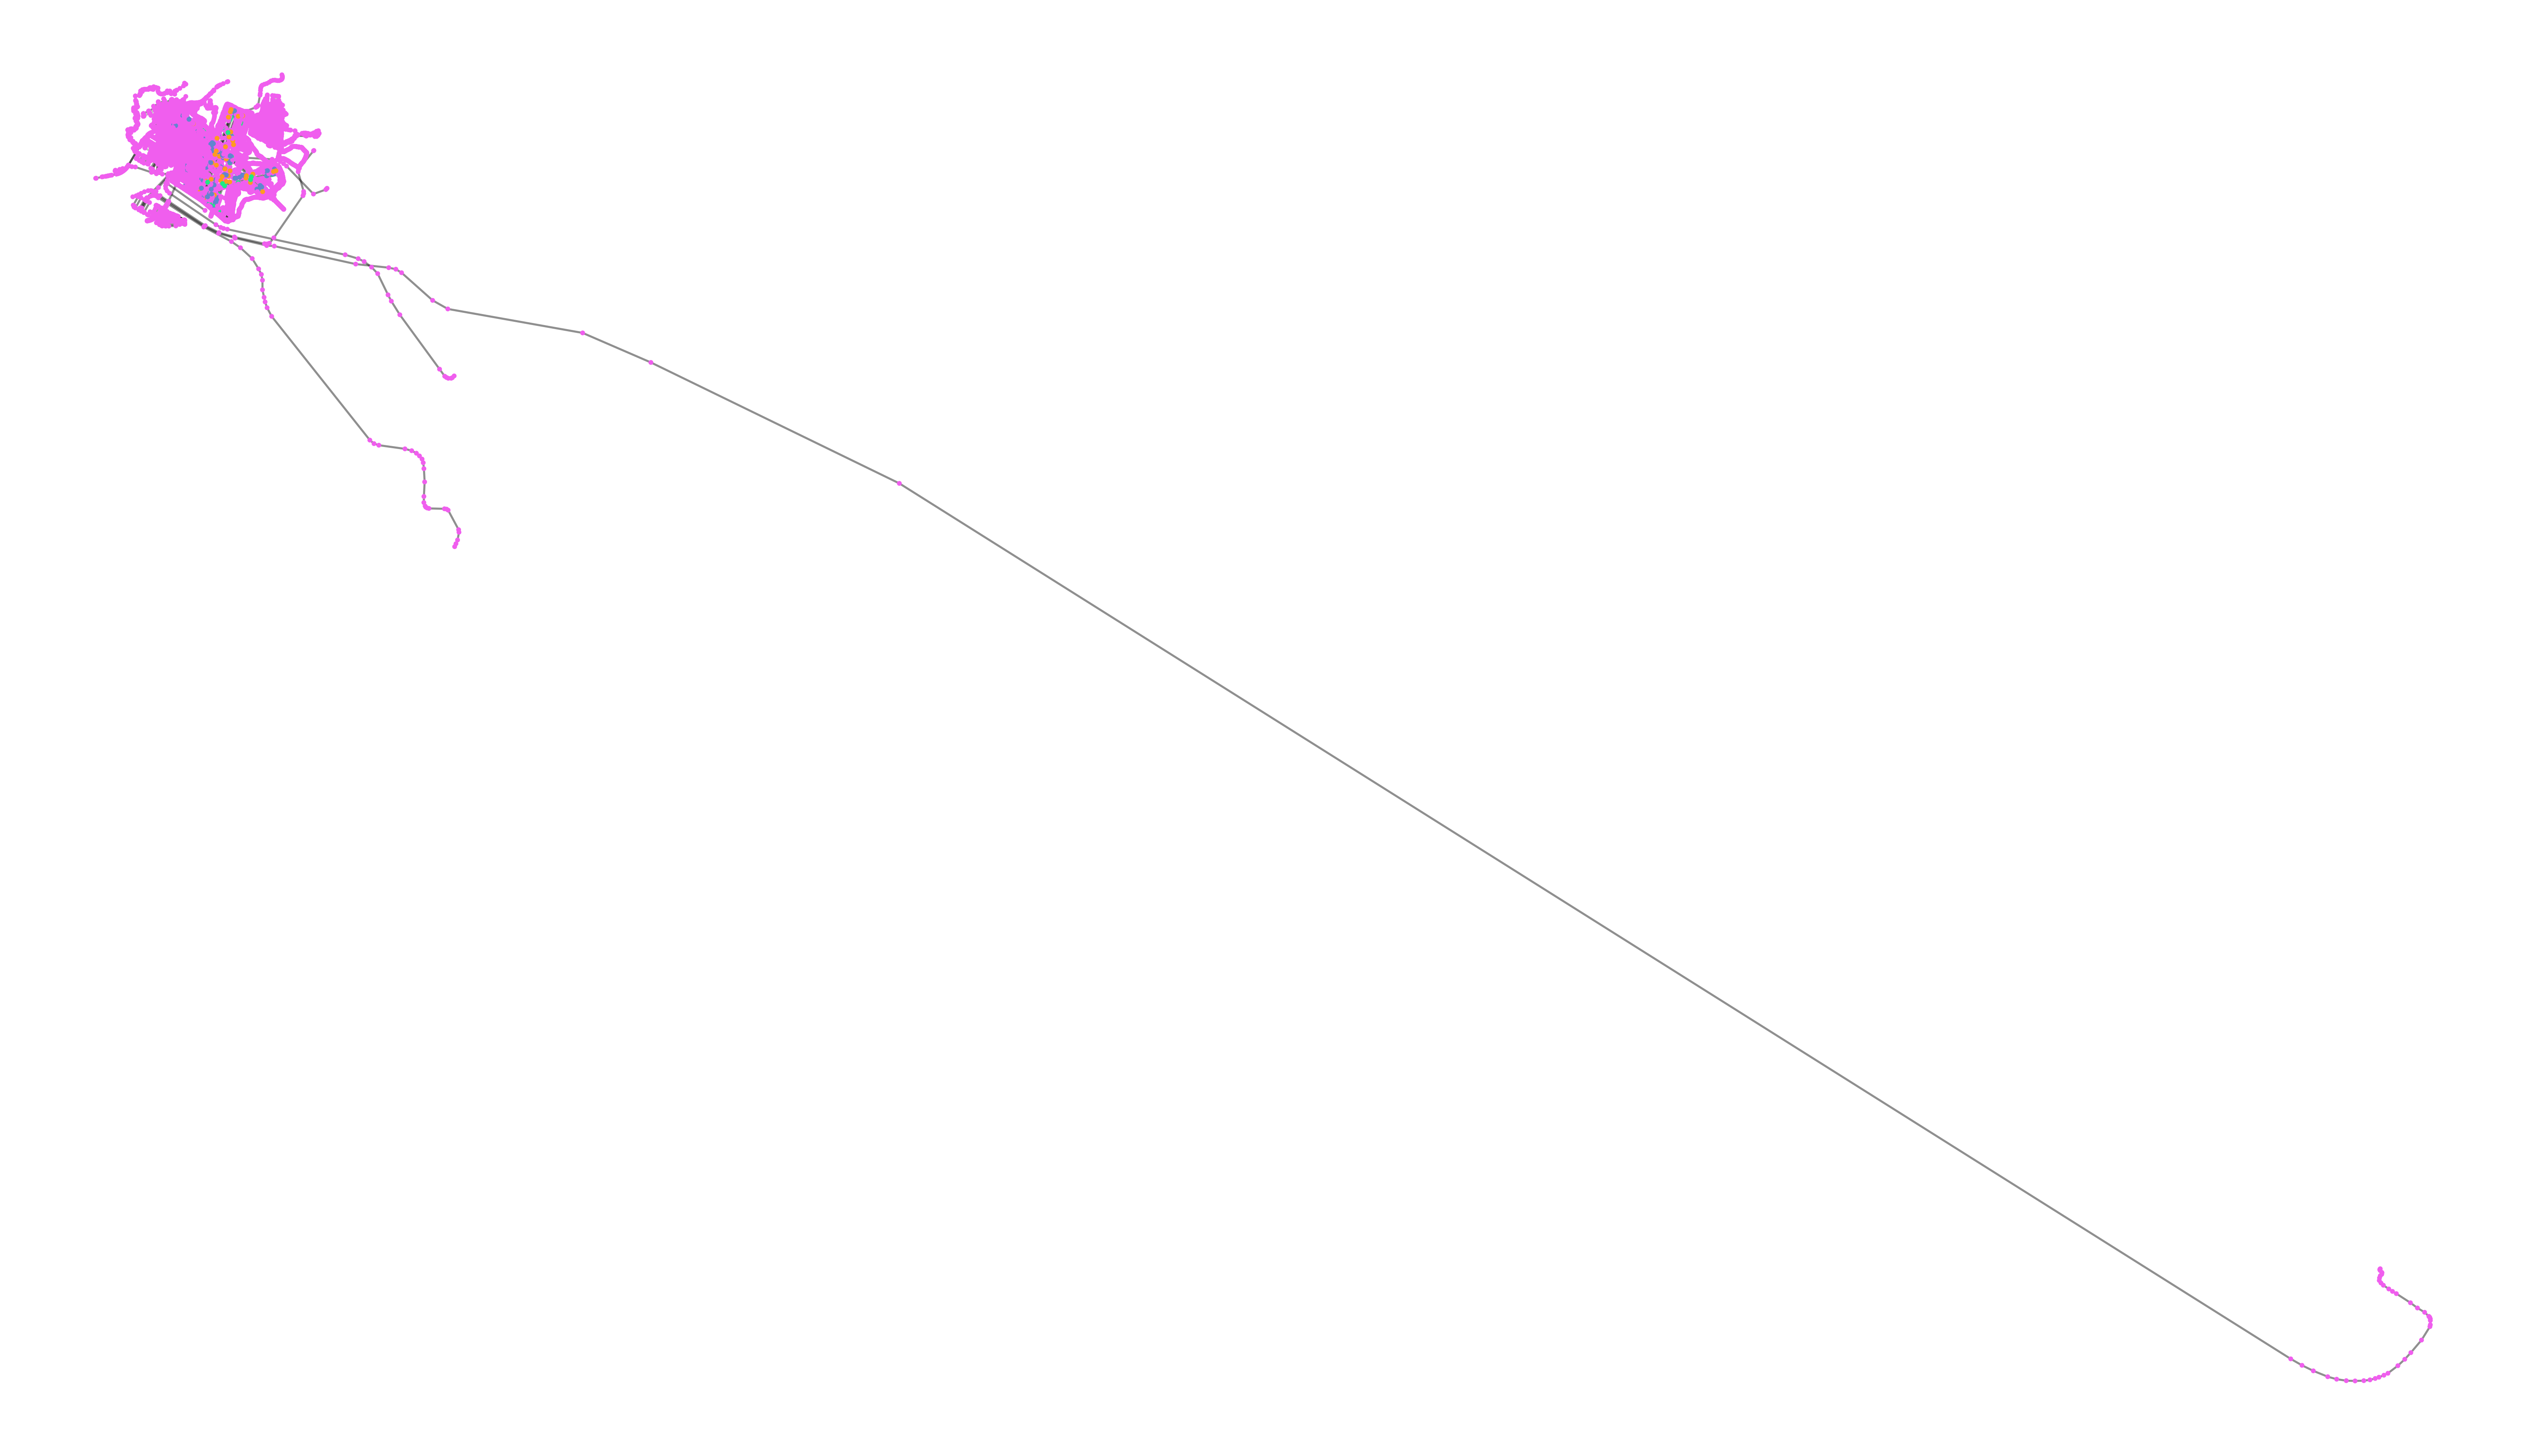

In [5]:
processor.get_routing_graph()
processor.display_and_save(False, True)

In [6]:
# Get raw data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KBOS Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        kbos        │
├───────────────────────┼────────────────────┤
│      node_count       │       44973        │
├───────────────────────┼────────────────────┤
│      edge_count       │       107574       │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.783937028883997  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 1695971.1369911472 │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 15.765623077984896 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


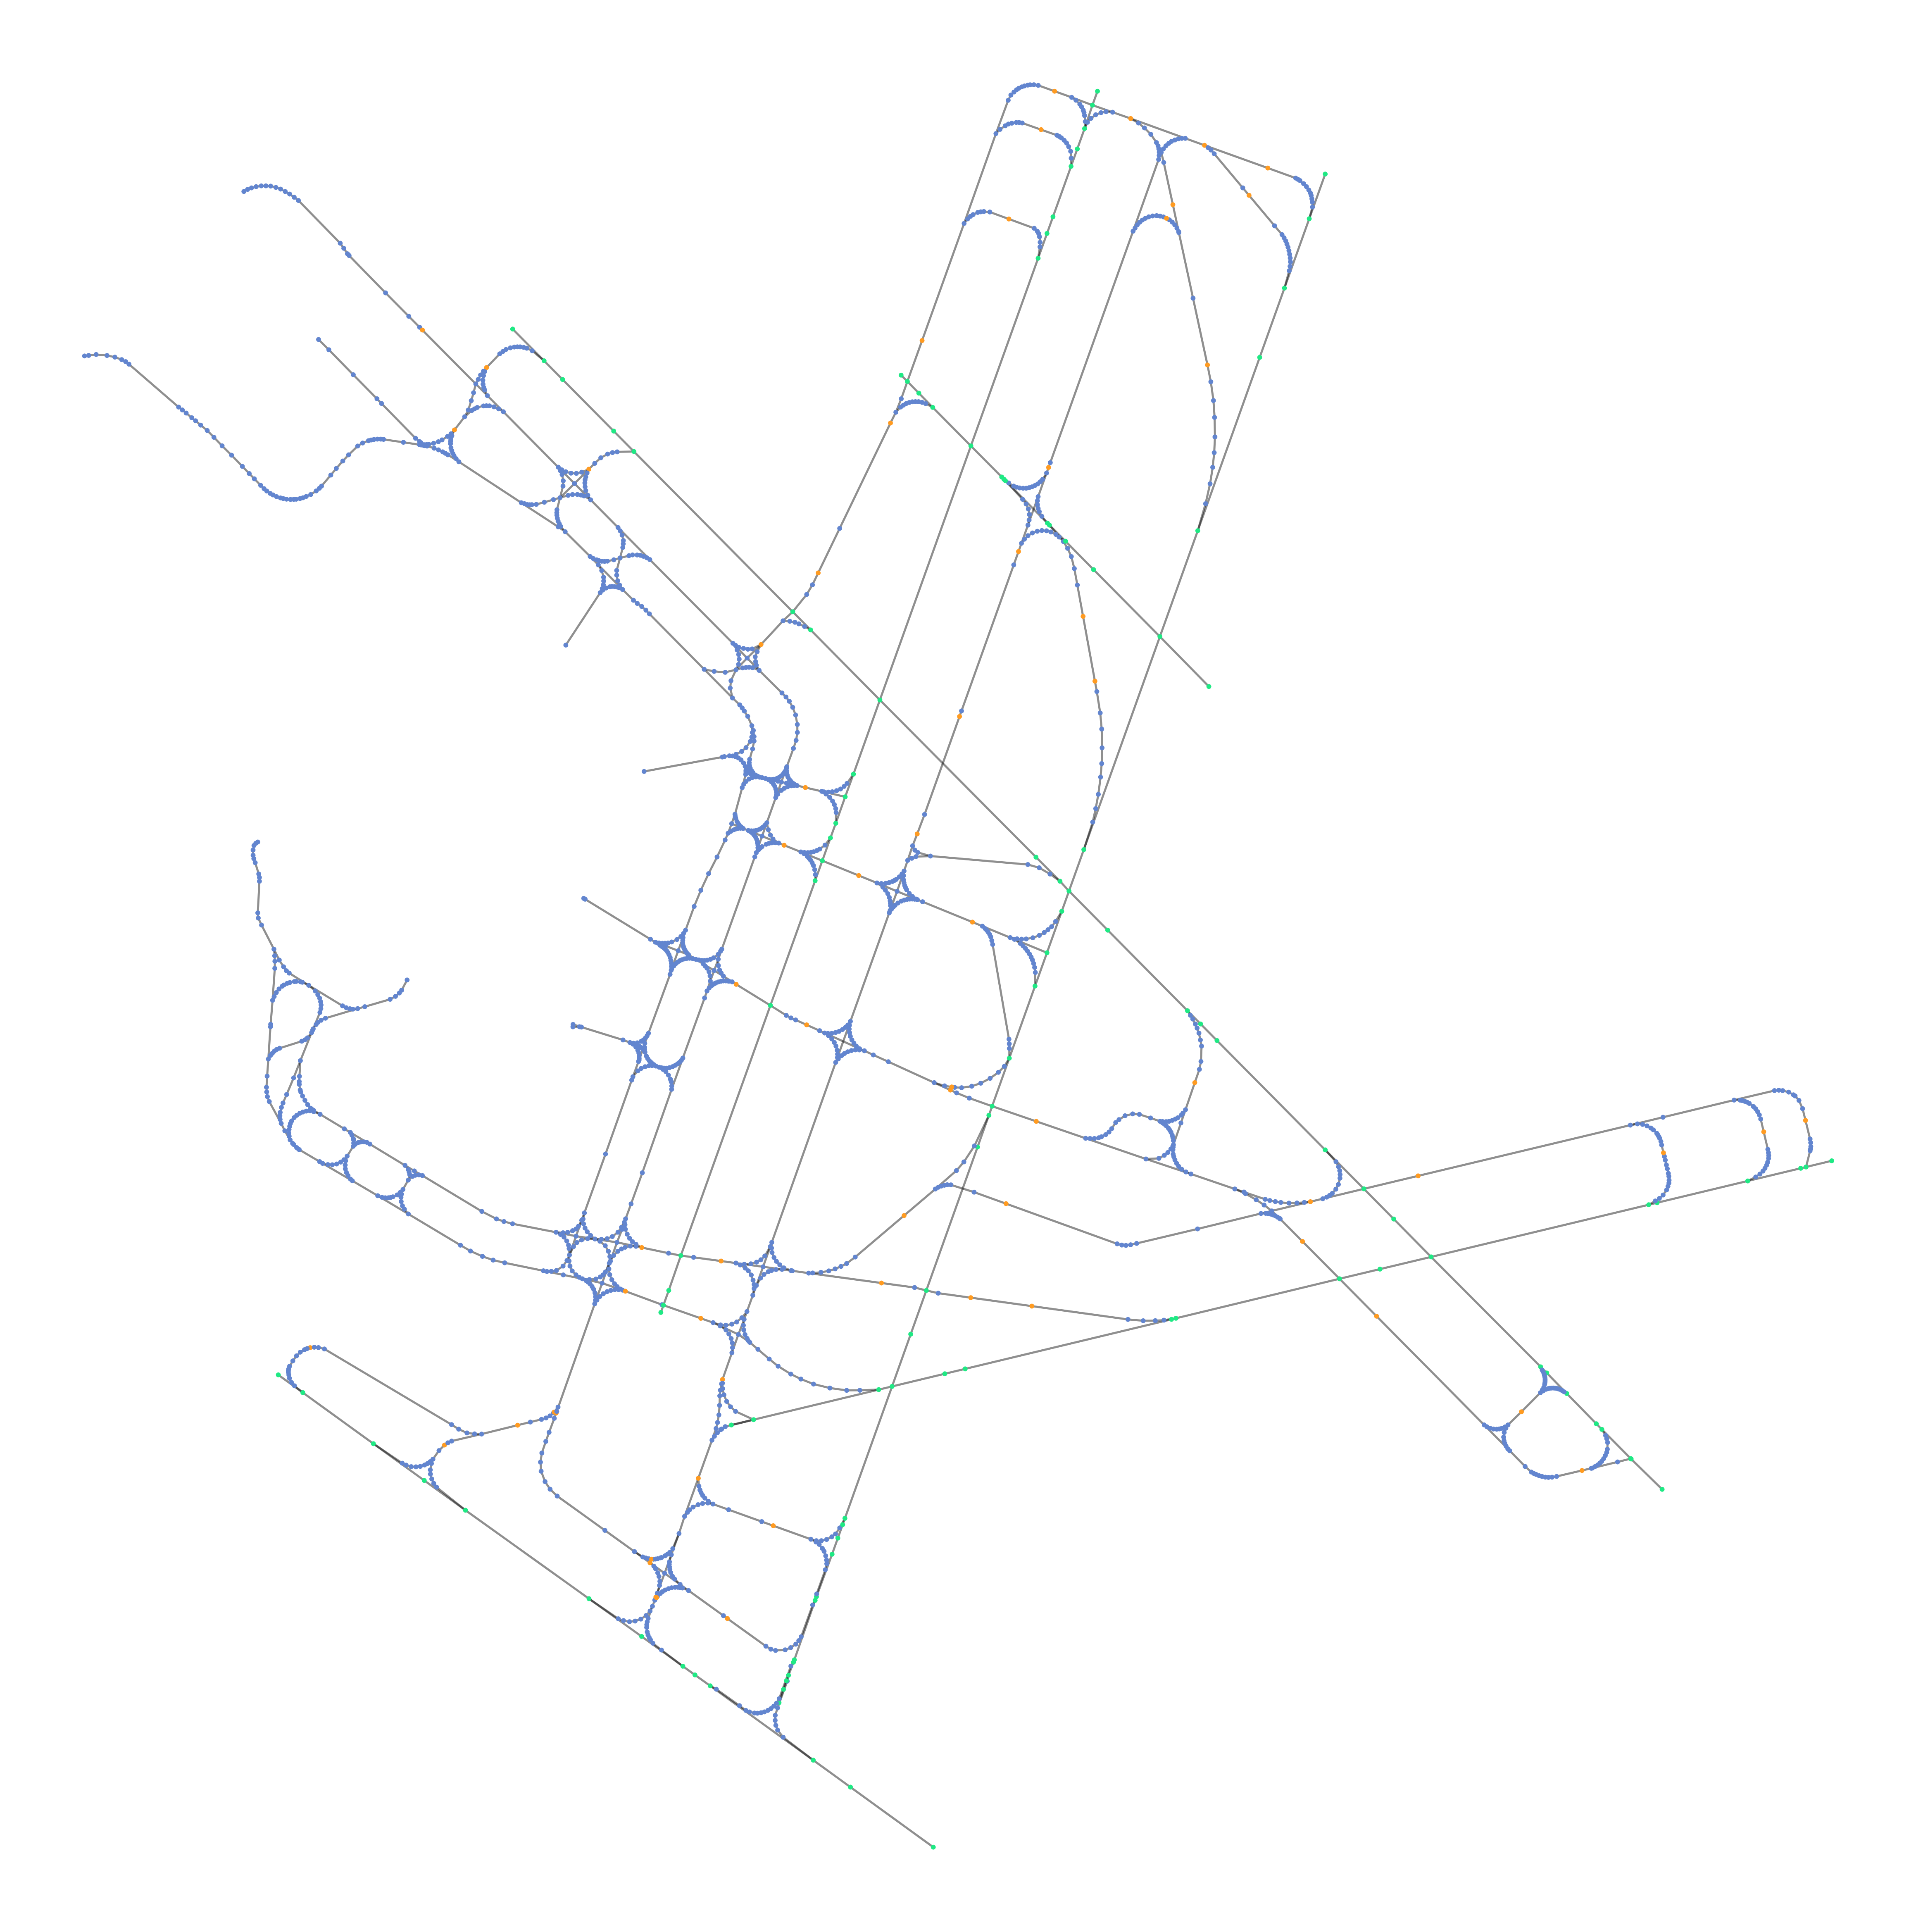

In [7]:
processor.sanitize()
processor.display_and_save(False, True)

In [8]:
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KBOS Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        kbos        │
├───────────────────────┼────────────────────┤
│      node_count       │        1897        │
├───────────────────────┼────────────────────┤
│      edge_count       │        4146        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.371112282551397  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 97867.65408893963  │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 23.605319365397882 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


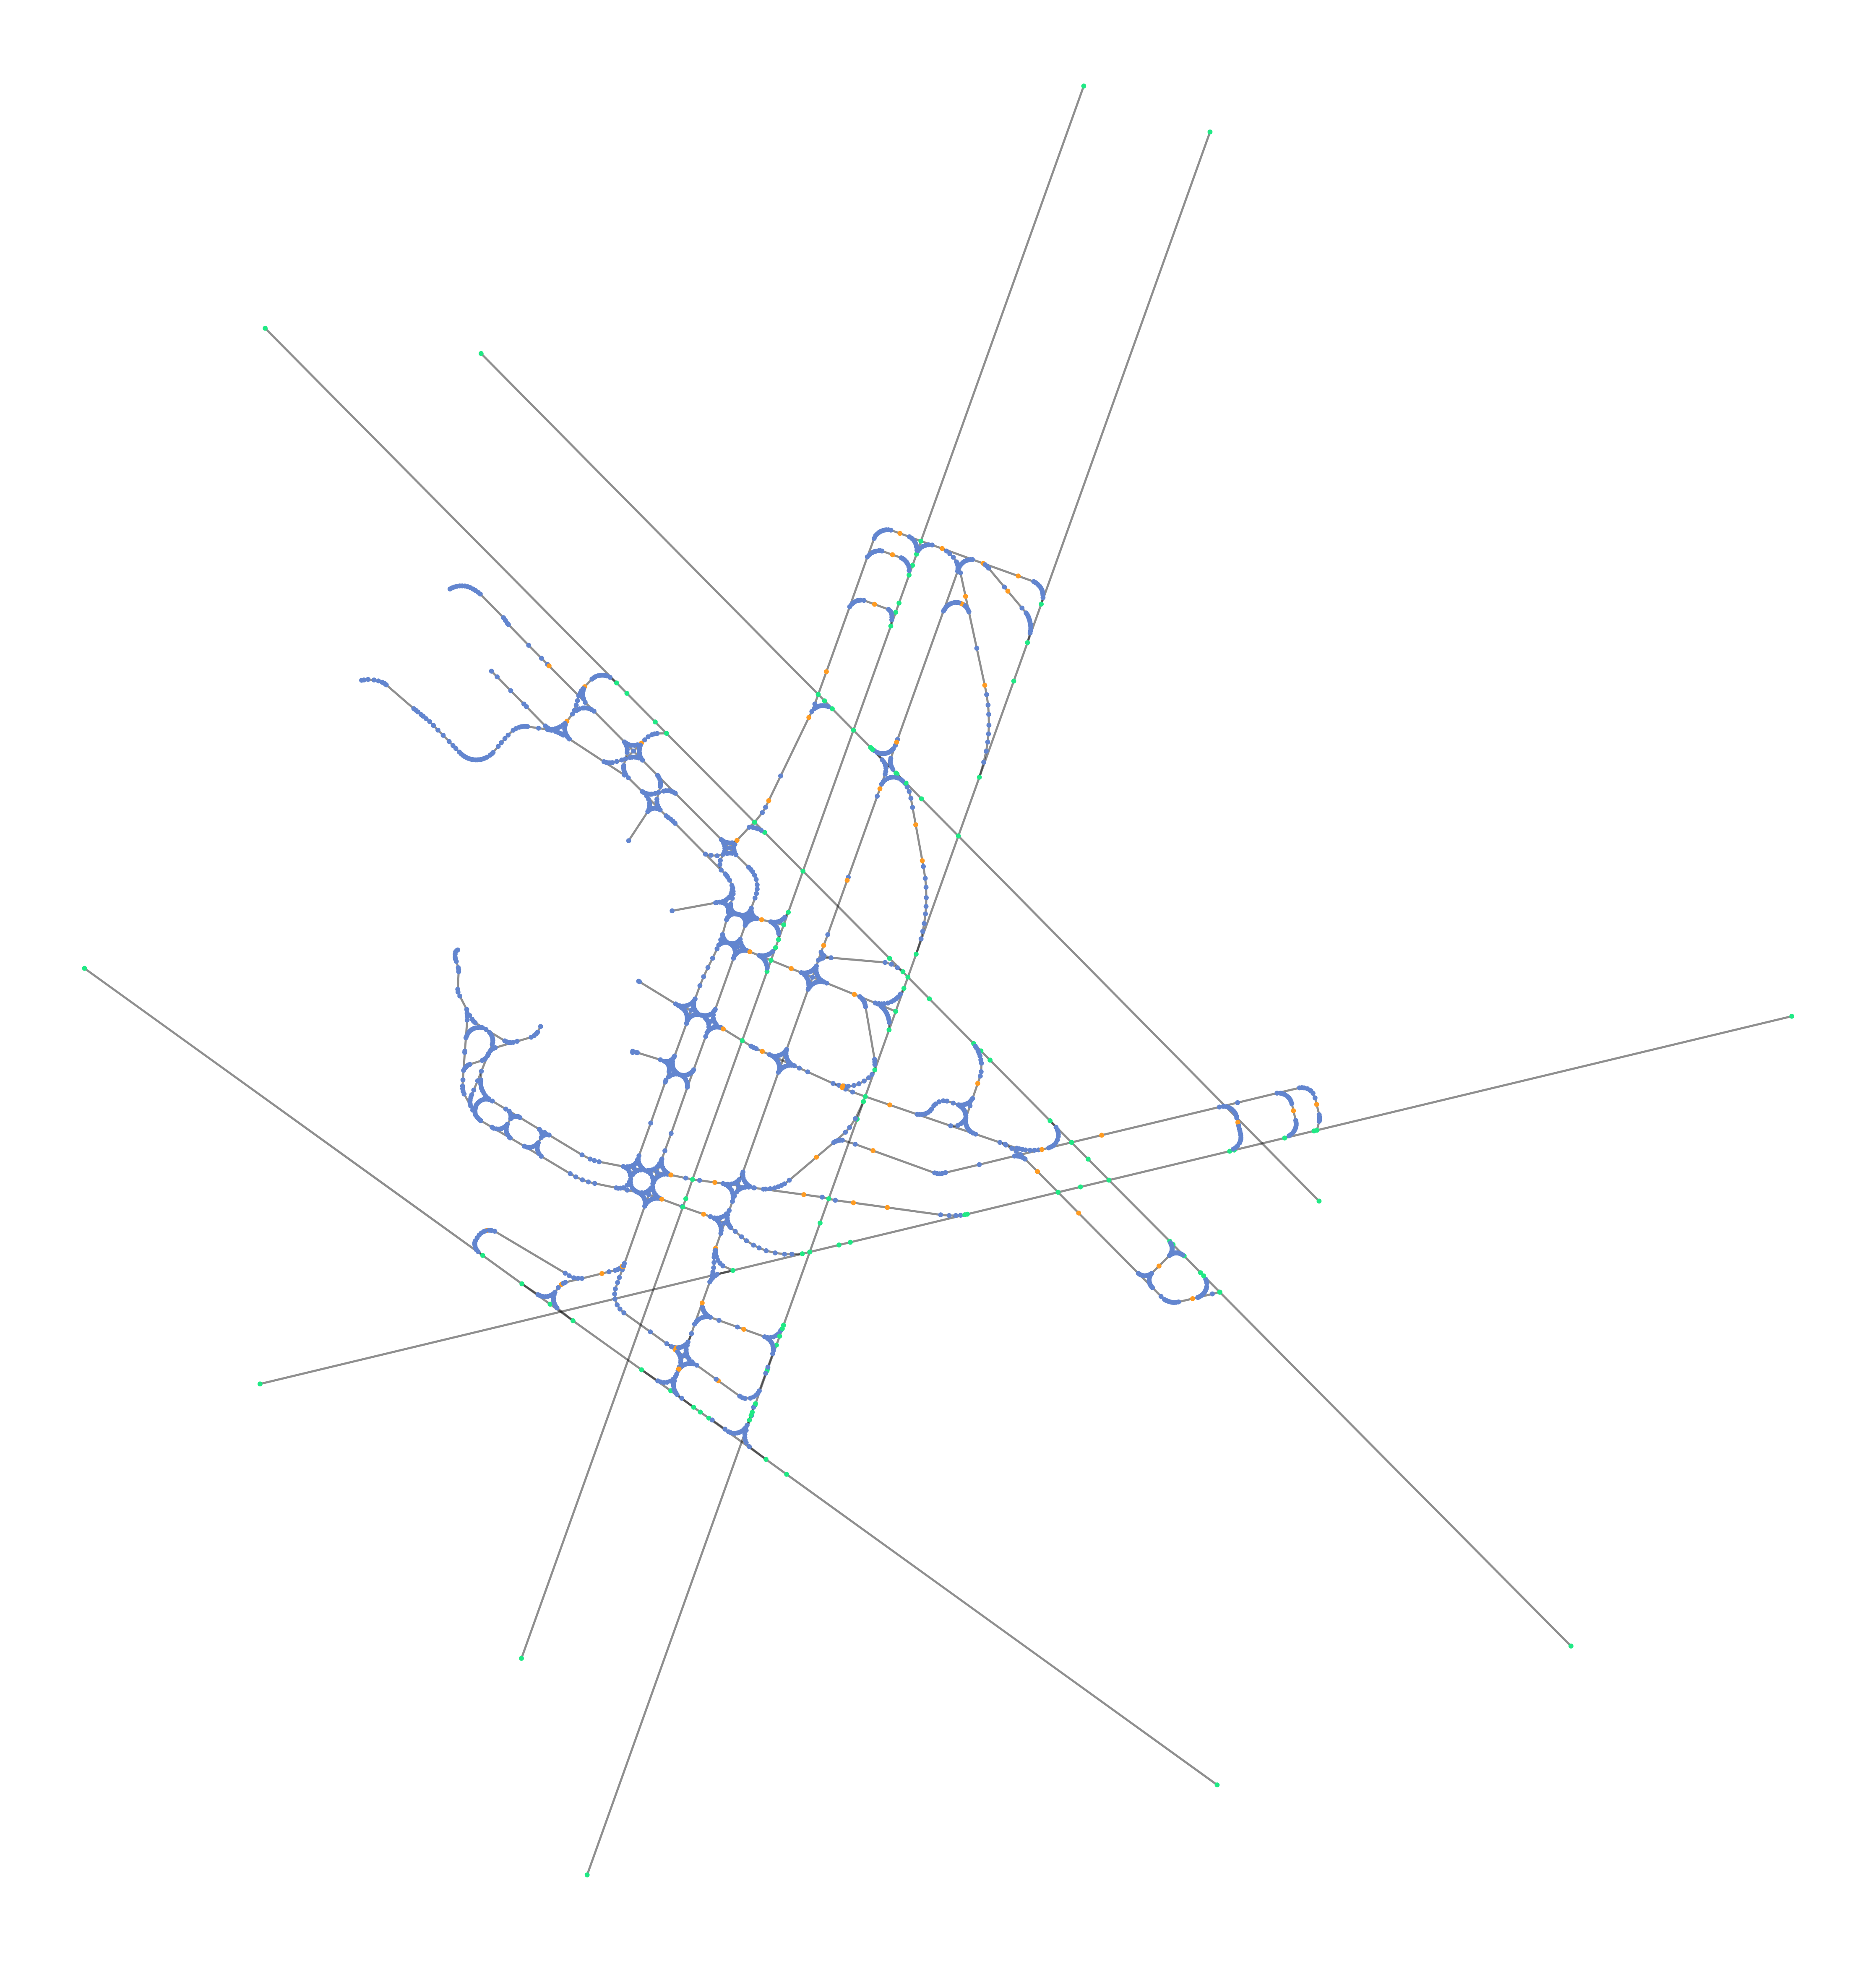

In [9]:
processor.extend_runways(extension_distance= 1609)
processor.display_and_save(False, True)

In [10]:
# Get filtered data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KBOS Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        kbos        │
├───────────────────────┼────────────────────┤
│      node_count       │        1897        │
├───────────────────────┼────────────────────┤
│      edge_count       │        4146        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.371112282551397  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 136483.6227045301  │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 32.919349422221444 │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


In [11]:
processor.sanitize()

In [12]:
thr = 80 # meters
processor.supersample_graph(thr, node_separation = 80)

Saving to out/kbos/semantic_kbos.osm


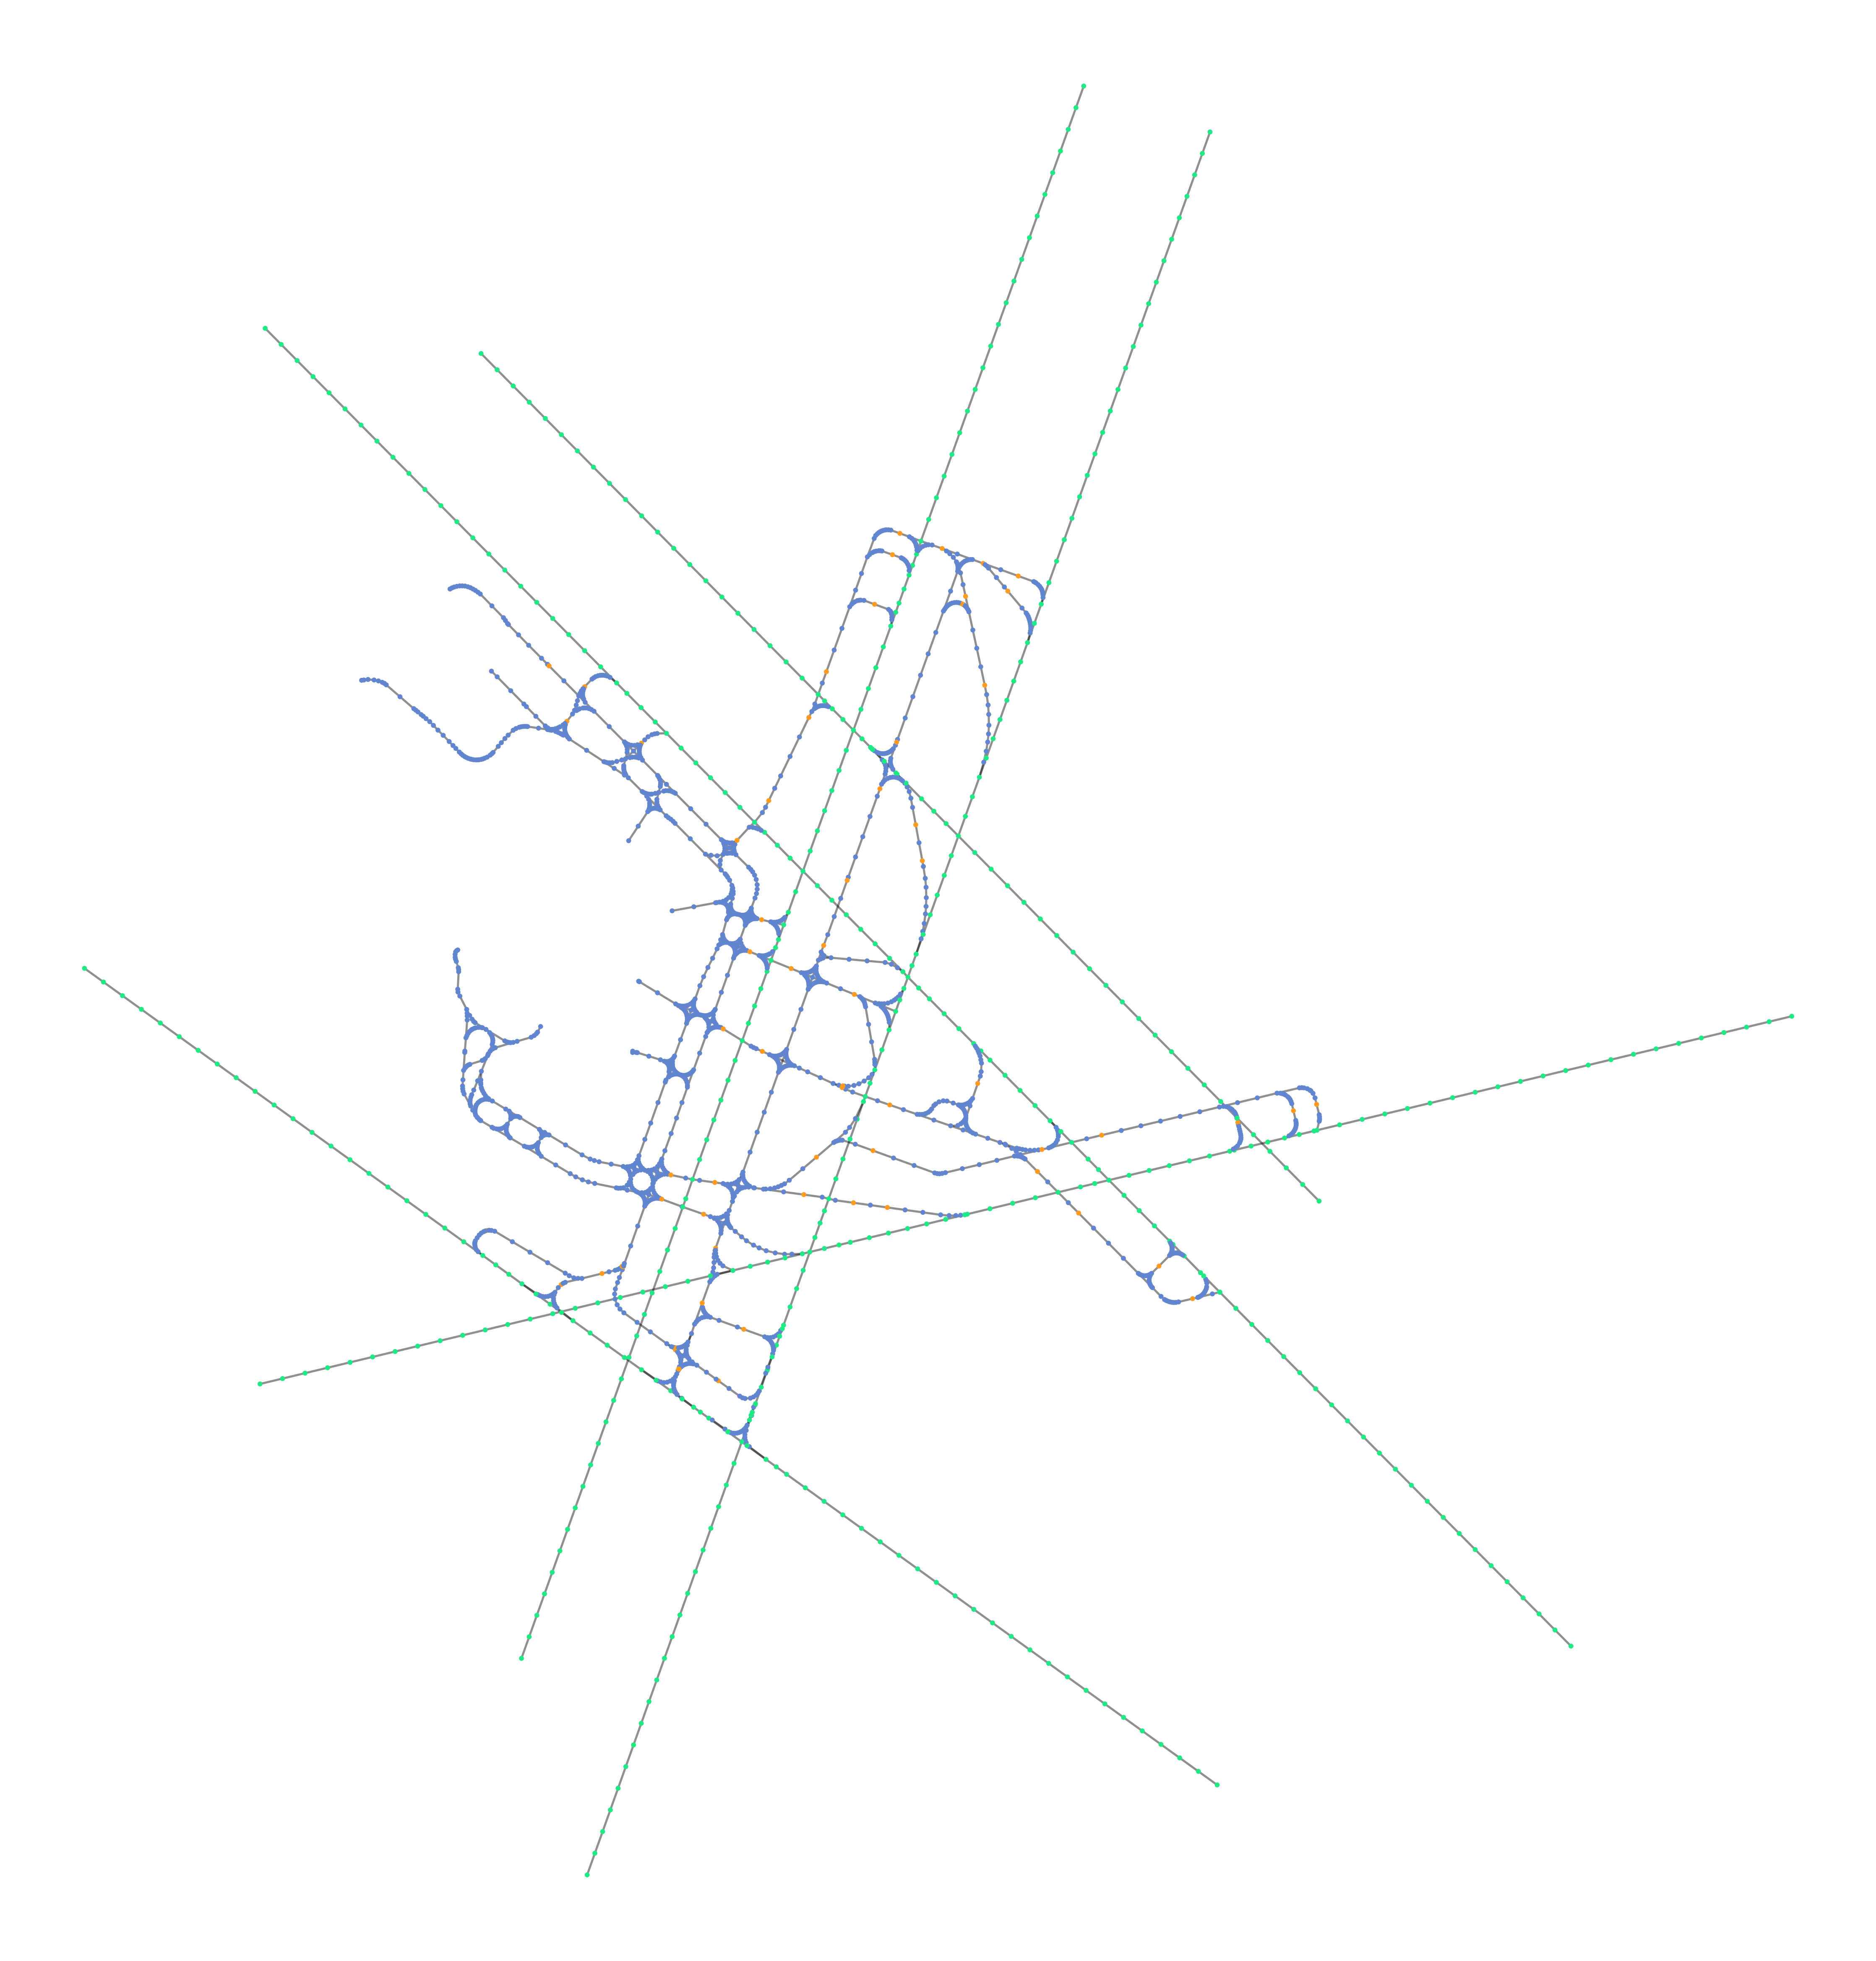

In [13]:
processor.display_and_save(True, True)

In [14]:
# Get final data stats
stats = processor.get_aiport_stats()
from utils.graph_utils import print_stats
print_stats(stats)

Airport KBOS Summary
------------------------------
╒═══════════════════════╤════════════════════╕
│       Statistic       │       Value        │
╞═══════════════════════╪════════════════════╡
│        airport        │        kbos        │
├───────────────────────┼────────────────────┤
│      node_count       │        2352        │
├───────────────────────┼────────────────────┤
│      edge_count       │        5056        │
├───────────────────────┼────────────────────┤
│    average_degree     │ 4.299319727891157  │
├───────────────────────┼────────────────────┤
│ edge_length_total (m) │ 136483.62279292283 │
├───────────────────────┼────────────────────┤
│  edge_length_avg (m)  │ 26.99438741948632  │
├───────────────────────┼────────────────────┤
│ self_loop_proportion  │        0.0         │
╘═══════════════════════╧════════════════════╛


In [15]:
# Add before and after comparison
processed_stats =  processor.get_aiport_stats()

In [16]:
processed_stats['node_count']

2352

In [17]:
node_count_comparison = raw_stats['node_count'] - processed_stats["node_count"]
nc_percentage = ((processed_stats["node_count"]/ raw_stats['node_count'] ) - 1) * 100
edge_count_comparison = raw_stats['edge_count'] - processed_stats["edge_count"]
edge_percentage = ((processed_stats["edge_count"]/ raw_stats['edge_count'] ) - 1) * 100
print(f"Reduced node count by: {node_count_comparison} ({nc_percentage}%)")
print(f"Reduced edge count by: {edge_count_comparison} ({edge_percentage}%)")

Reduced node count by: 42621 (-94.7701954506037%)
Reduced edge count by: 102518 (-95.29997954896164%)


# Plot processed graph

In [18]:
base_dir = 'out'
airport  = 'kbos'
graph_file = os.path.join(base_dir, airport, 'semantic_graph.pkl')
with open(graph_file, 'rb') as f:
    temp_dict = pickle.load(f)
processed_graph  = temp_dict['map_infos']['all_polylines'][:, map_idxs]
hold_lines  = temp_dict['hold_lines']
hold_lines.shape

(286, 6)

In [19]:
from utils.graph_utils import plot_context
_, global_map= plt.subplots(figsize=(20, 20), dpi=500)
plot_context(processed_graph, global_map)